In [1]:
!pip install bangla_stemmer
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.8 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=f371722479660fb87bc87f07dcb6863ace8c347a41e96878616ff1c7e2ff80df
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bnlp import NLTKTokenizer
from bs4 import BeautifulSoup
from bnlp import BengaliCorpus as corpus
import re
from bangla_stemmer.stemmer import stemmer

In [3]:
df_train = pd.read_csv("/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Train.csv")

In [4]:
df_train.head()

,Data,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভাল লেগেছে,1
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,0


In [5]:
df_train.dropna(inplace=True)

In [6]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

372


In [7]:
df_train['Label'].value_counts()

Label
1    5133
2    4548
0    2894
Name: count, dtype: int64

In [8]:
df_train['Label'] = df_train['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [9]:
df_val = pd.read_csv("/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Val.csv")

In [10]:
df_val.dropna(inplace=True)

In [11]:
df_val['Label'].value_counts()

Label
1    623
2    590
0    354
Name: count, dtype: int64

In [12]:
df_val['Label'] = df_val['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [13]:
df_val['Label'].value_counts()

Label
Positive    623
Negative    590
Neutral     354
Name: count, dtype: int64

In [14]:
def rem_symbol_punct(text):
    pattern = re.compile('[!@#$%^&*()_+-={}\[\];:\'\"\|<>,.///?`~।]', flags=re.I)
    return pattern.sub(r'', text)


def remove_html_and_urls(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text_without_html = soup.get_text()

    # Remove URLs
    text_without_urls = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text_without_html)

    return text_without_urls


def remove_emojis(text):
    # Emoji patterns for different Unicode ranges
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F700-\U0001F77F"  # Alphanumeric Supplement
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbat symbols
        "\U000024C2-\U0001F251" 
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r'', text)


#remove noise
def Remove_text(text):
    text = rem_symbol_punct(text)
    text = remove_html_and_urls(text)
    text = remove_emojis(text)
    return text

In [15]:
df_train['Data'] = df_train['Data'].apply(Remove_text)
df_val['Data'] = df_val['Data'].apply(Remove_text)

In [16]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

370


In [17]:
df_train

,Data,Label
0,মুগ্ধ হয়ে গেলাম মামু আর তোমায় কি কমু বলো তোমায়...,Positive
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,Negative
2,ভাই আপনার কথাই যাদু রয়েছে,Positive
3,উওরটা আমার অনেক ভাল লেগেছে,Positive
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ...,Neutral
...,...,...
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চলে...,Positive
12571,আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...,Negative
12572,ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...,Positive
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...,Negative


In [18]:
# Instantiate the NLTKTokenizer
bnltk = NLTKTokenizer()


def remove_stopwords(text):
    # Get the list of Bengali stopwords
    bengali_stopwords = corpus.stopwords
    
    # Tokenize the Bengali text using NLTKTokenizer
    word_tokens = bnltk.word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [token for token in word_tokens if token not in bengali_stopwords]
    
    # Join the filtered tokens back into a text
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text


In [19]:
df_train['Data'] = df_train['Data'].apply(remove_stopwords)
df_val['Data'] = df_val['Data'].apply(remove_stopwords)

In [20]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

266


In [21]:
def apply_bangla_stemming(text):
    stmr = stemmer.BanglaStemmer()
    word_tokens = bnltk.word_tokenize(text)
    stemmed_words = [stmr.stem(word) for word in word_tokens]
    return ' '.join(stemmed_words)


In [22]:
# Example usage:
df_train['Data'] = df_train['Data'].apply(apply_bangla_stemming)
df_val['Data'] = df_val['Data'].apply(apply_bangla_stemming)

applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..

In [23]:
df_train['Data']

0        মুগ্ধ হয় গেল মামু তোমায় কমু বলো তোমায় কোথায় পা...
1        কুত্ত বাচ্চা দেশ অবস্তায় তিন পুলিশ তরে মার পেল...
2                                          ভাই কথা যাদু রয়
3                                              উওর ভাল লাগ
4                           গাড়ী সাজেক পারবো প্রাইভেট কার
                               ...                        
12570    বর্ডারে লেট হয় যাওয়াতে জিপে যাই বিকাল টার শিলি...
12571    সোন বাংলা রক্ষক নাম ভক্ষক জায়গা হবেনা মাননীয় প...
12572    ওনারা হাইজিনিক সুন্দর পরিবেশ রান্না বাসাবাড়ি ছ...
12573                    বাংলাদেশ পুলিশ চাই ধরনে পুলিশ দরক
12574               বসুন্ধ শাখা হাজি বিরিয়ানি একবারে ফালতু
Name: Data, Length: 12575, dtype: object

In [24]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

246


In [25]:
df_train['Data'] 

0        মুগ্ধ হয় গেল মামু তোমায় কমু বলো তোমায় কোথায় পা...
1        কুত্ত বাচ্চা দেশ অবস্তায় তিন পুলিশ তরে মার পেল...
2                                          ভাই কথা যাদু রয়
3                                              উওর ভাল লাগ
4                           গাড়ী সাজেক পারবো প্রাইভেট কার
                               ...                        
12570    বর্ডারে লেট হয় যাওয়াতে জিপে যাই বিকাল টার শিলি...
12571    সোন বাংলা রক্ষক নাম ভক্ষক জায়গা হবেনা মাননীয় প...
12572    ওনারা হাইজিনিক সুন্দর পরিবেশ রান্না বাসাবাড়ি ছ...
12573                    বাংলাদেশ পুলিশ চাই ধরনে পুলিশ দরক
12574               বসুন্ধ শাখা হাজি বিরিয়ানি একবারে ফালতু
Name: Data, Length: 12575, dtype: object

In [26]:
X_train  =  df_train['Data'].values.tolist()
y_train = df_train['Label'].tolist()

In [27]:
X_test =  df_val['Data'].values.tolist()
y_test = df_val['Label'].tolist()

In [28]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 41.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 49.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 27.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 13.0 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=4d426bb65b1fc5a21caec669edc63df7bf69e48bbc977de02c1a1d807673489a
  Stored in directory: /roo

In [29]:
import ktrain
from ktrain import text
MODEL_NAME = 'csebuetnlp/banglabert'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [30]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 9
	95percentile : 22
	99percentile : 28


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 10
	95percentile : 22
	99percentile : 28


In [31]:
print(trn)

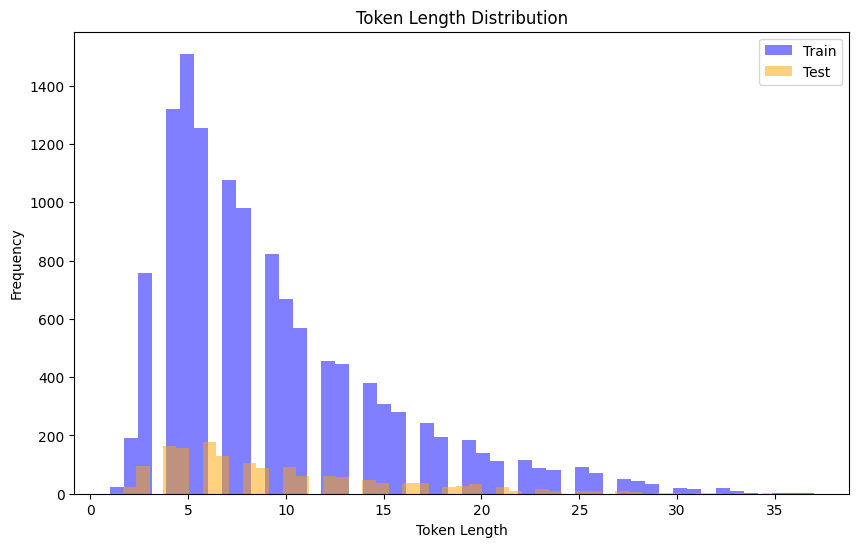

In [32]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [33]:
model = t.get_classifier()

In [34]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [35]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [36]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1572/1572 [==============================] - 913s 565ms/step - loss: 0.9131 - accuracy: 0.5835 - val_loss: 0.7782 - val_accuracy: 0.6624
Epoch 2/10
1572/1572 [==============================] - 884s 562ms/step - loss: 0.7370 - accuracy: 0.6841 - val_loss: 0.7345 - val_accuracy: 0.6784
Epoch 3/10
1572/1572 [==============================] - 883s 562ms/step - loss: 0.6179 - accuracy: 0.7485 - val_loss: 0.7091 - val_accuracy: 0.7084
Epoch 4/10
1572/1572 [==============================] - 883s 562ms/step - loss: 0.4988 - accuracy: 0.8073 - val_loss: 0.7821 - val_accuracy: 0.7039
Epoch 5/10
1572/1572 [==============================] - 884s 562ms/step - loss: 0.3857 - accuracy: 0.8590 - val_loss: 0.8667 - val_accuracy: 0.7077
Epoch 6/10
1572/1572 [==============================] - 883s 562ms/step - loss: 0.2787 - accuracy: 0.9014 - val_loss: 0.9758 - val_accuracy: 0.7109
Epoch 7/10
1572/1572 [===========================

In [37]:
# Save the trained model
learner.save_model('/kaggle/output/model.zip')

In [38]:
classes=t.get_classes()

In [39]:
cm = learner.validate(class_names=t.get_classes())

49/49 [==============================] - 8s 98ms/step
              precision    recall  f1-score   support

    Negative       0.80      0.79      0.79       590
     Neutral       0.53      0.55      0.54       354
    Positive       0.77      0.76      0.77       623

    accuracy                           0.72      1567
   macro avg       0.70      0.70      0.70      1567
weighted avg       0.73      0.72      0.73      1567



In [40]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [41]:
!zip -r mental.zip /kaggle/output/model

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/model

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/model)


In [42]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb


In [43]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [44]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")